FuzzyLite Report
---
By:Fatemeh Shiri
---

<b>pyfuzzylite is a free and open-source fuzzy logic control library programmed in python for multiple platforms.it supports different features of fuzzy logic like:</b>
<br>
<b>Controllers</b>: Mamdani, Takagi-Sugeno, Larsen, Tsukamoto, Inverse Tsukamoto, Hybrids
<br>

<b>Linguistic terms</b>:Basic: triangle, trapezoid, rectangle, discrete.Extended: bell, cosine, gaussian, gaussian product, pi-shape, sigmoid difference, sigmoid product, spike.Edges: binary, concave, ramp, sigmoid, s-shape, z-shape.
Functions: constant, linear, function.
<br>

<b>Activation methods</b>: general, proportional, threshold, first, last, lowest, highest.
<br>

<b>Conjunction and Implication (T-Norms)</b>: minimum, algebraic product, bounded difference, drastic product, einstein product, hamacher product, nilpotent minimum, function.
<br>

<b>Disjunction and Aggregation (S-Norms)</b>: maximum, algebraic sum, bounded sum, drastic sum, einstein sum, hamacher sum, nilpotent maximum, normalized sum, unbounded sum, function.
<br>

<b>Defuzzifiers:Integral</b>: centroid, bisector, smallest of maximum, largest of maximum, mean of maximum. (2) Weighted: weighted average, weighted sum.
<br>

<b>Hedges</b>: any, not, extremely, seldom, somewhat, very, function.
<br>

<br>
So many examples are coded in github page of fuzzy lite which i took one of them to test and it's mentioned bellow.
<br>

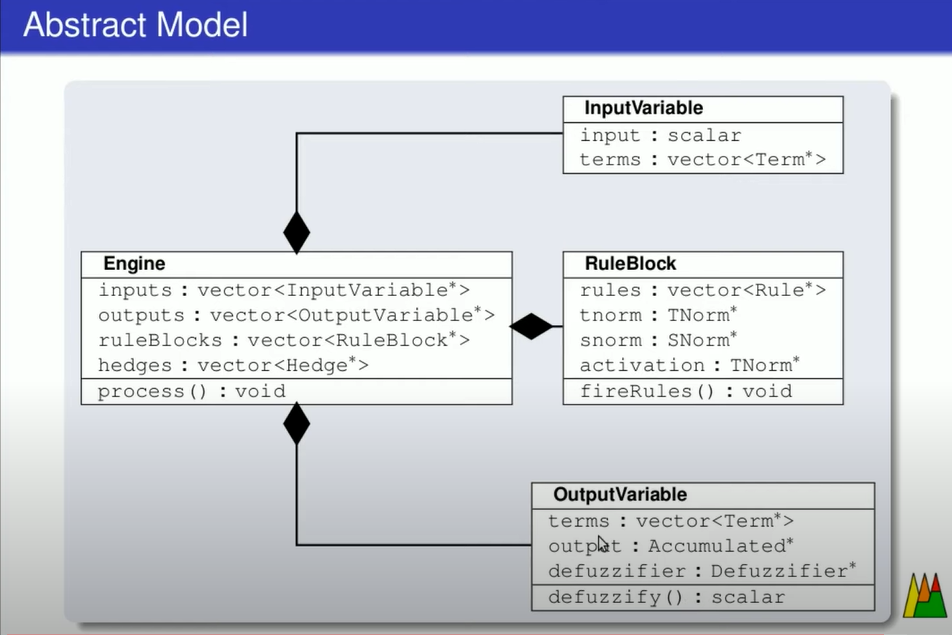

---

<b>Install</b>

In [4]:
!pip install pyfuzzylite

In [8]:
import fuzzylite as fl

<b>Code Example</b>

#FLL FILE FORMAT


In [10]:
engine = fl.Engine(
    name="Bell",
    description="obstacle avoidance for self-driving cars"
)
engine.input_variables = [
    fl.InputVariable(
        name="obstacle",
        description="location of obstacle relative to vehicle",
        enabled=True,
        minimum=0.000000000,
        maximum=1.000000000,
        lock_range=False,
        terms=[
            fl.Triangle("left", 0.000000000, 0.333000000, 0.666000000),
            fl.Triangle("right", 0.333000000, 0.666000000, 1.000000000)
        ]
    )
]
engine.output_variables = [
    fl.OutputVariable(
        name="steer",
        description="direction to steer the vehicle to",
        enabled=True,
        minimum=0.000000000,
        maximum=1.000000000,
        lock_range=False,
        aggregation=fl.Maximum(),
        defuzzifier=fl.Centroid(100),
        lock_previous=False,
        terms=[
            fl.Bell("left", 0.333000000, 0.166500000, 3.000000000),
            fl.Bell("right", 0.666500000, 0.166750000, 3.000000000)
        ]
    )
]
engine.rule_blocks = [
    fl.RuleBlock(
        name="steer_away",
        description="steer away from obstacles",
        enabled=True,
        conjunction=None,
        disjunction=None,
        implication=fl.Minimum(),
        activation=fl.General(),
        rules=[
            fl.Rule.create("if obstacle is left then steer is right", engine),
            fl.Rule.create("if obstacle is right then steer is left", engine)
        ]
    )
]